In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import scipy 
from scipy.stats import ortho_group
import pdb
import tqdm
import matplotlib.pyplot as plt

In [27]:
from statsmodels import tsa
import pylds
from pylds.models import DefaultLDS
import pykalman

In [26]:
# Pylds doesn't seem to allow inference for latent noise

In [5]:
from neurosim.models.ssr import StateSpaceRealization as SSR

In [6]:
# Test the statsmodels state space inference and how long it takes to do the inference

In [7]:
size = 20
A = 1/(np.sqrt(size)) * np.random.normal(size=(size, size))
while max(np.abs(np.linalg.eigvals(A)) > 0.99):
    A = 1/(np.sqrt(size)) * np.random.normal(size=(size, size))

ssr = SSR(A = A, B=ortho_group.rvs(size)[:, 0:4], C = np.eye(A.shape[0]))

In [8]:
x = ssr.trajectory(int(1e4))

In [11]:
x.shape

(10001, 20)

In [22]:
D_obs = size
D_latent = size
D_input = 4
model = DefaultLDS(D_obs, D_latent, D_input)

In [23]:
model.add_data(x)

In [24]:
def update(model):
    model.EM_step()
    return model.log_likelihood()

In [25]:
lls = [update(model) for _ in tqdm.tqdm(range(50))]

ValueError: shapes (10000,0) and (4,20) not aligned: 0 (dim 1) != 4 (dim 0)

Text(0, 0.5, 'training likelihood')

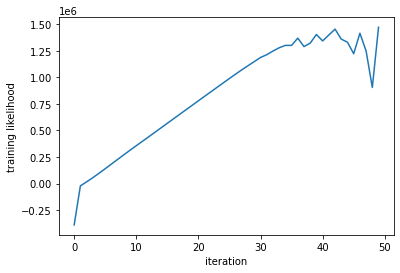

In [21]:
# Plot the log likelihoods
plt.figure()
plt.plot(lls)
plt.xlabel('iteration')
plt.ylabel('training likelihood')

In [ ]:
kf = pykalman.KalmanFilter(n_dim_state=size, n_dim_obs=size
    em_vars=[
      'transition_matrices', 'observation_matrices',
      'transition_covariance', 'observation_covariance',
      'observation_offsets', 'initial_state_mean',
      'initial_state_covariance'
    ]
)